In [6]:
import os
import librosa
import pydub

In [3]:
root_folder = "D:/Data/MS_word_laughter_timings/data/alignments"

In [4]:
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if ".DS_Store" in file:
            continue
        print(os.path.join(subdir, file))
        f = file
        break
    #break

D:/Data/MS_word_laughter_timings/data/alignments\3\sw3166B-ms98-a-penn.text
D:/Data/MS_word_laughter_timings/data/alignments\4\sw4004A-ms98-a-penn.text
D:/Data/MS_word_laughter_timings/data/alignments\2\sw2005A-ms98-a-penn.text


In [37]:
#
import os

folder_path = r"D:\Data\switchboard1\swb1"
folder_path2 = r"D:\Data\MS_word_laughter_timings\data\alignments\combined"

file_count = sum(1 for item in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, item)))
print(f"Number of files: {file_count}")
file_count2 = sum(1 for item in os.listdir(folder_path2) if os.path.isfile(os.path.join(folder_path2, item)))
print(f"Number of files: {file_count2}")

Number of files: 755
Number of files: 2252


In [32]:
#CREATING LABELS 
import numpy as np
import pandas as pd
import os

subtitle_folder = r"C:\Users\micha\Documents\project (backup)\switchboard1\combined"
npy_folder = r"C:\Users\micha\Documents\project (backup)\switchboard1\second_npy_files"

os.makedirs(npy_folder, exist_ok=True)

bin_size = 0.01

def process_subtitle_file(subtitle_path):
    df = pd.read_csv(subtitle_path, sep='\t', header=None)

    start_times = df[2].values
    end_times = df[3].values
    labels = df[6].values
    total_duration = end_times.max()
    time_steps = np.arange(0, total_duration, bin_size)
    label_array = np.zeros_like(time_steps, dtype=np.int8)

    for start, end, label in zip(start_times, end_times, labels):
        start_index = int(np.floor(start / bin_size))
        end_index = int(np.floor(end / bin_size))
        indices = np.arange(start_index, end_index)

        label = str(label).strip()
        if label == '[laughter]':
            label_array[indices] = 1
        elif label == '[silence]':
            label_array[indices] = 0
        else:
            label_array[indices] = 2 
    base_filename = os.path.splitext(os.path.basename(subtitle_path))[0]
    output_path = os.path.join(npy_folder, base_filename + '.npy')
    np.save(output_path, label_array)


for filename in os.listdir(subtitle_folder):
    subtitle_path = os.path.join(subtitle_folder, filename)
    process_subtitle_file(subtitle_path)

print("done")

done


In [72]:
#EXTRACTING RMS VALUES
import os
import numpy as np
import librosa
import soundfile as sf

wav_folder = r"C:\Users\micha\Documents\project (backup)\switchboard1\wav"
output_folder = r"C:\Users\micha\Documents\project (backup)\switchboard1\rms" 
os.makedirs(output_folder, exist_ok=True)

sample_rate = 8000
hop_length = 80
frame_length = 400  

for filename in os.listdir(wav_folder):
    if filename.endswith(".wav"):
        wav_path = os.path.join(wav_folder, filename)
        y, sr = sf.read(wav_path)
        
        if sr != sample_rate:
            print(f"Warning: Sample rate mismatch in {filename}. Expected {sample_rate}, got {sr}")
        left_channel = y[:, 0]
        right_channel = y[:, 1]
        rms_left = librosa.feature.rms(y=left_channel, frame_length=frame_length, hop_length=hop_length)
        rms_right = librosa.feature.rms(y=right_channel, frame_length=frame_length, hop_length=hop_length)
        base_name = os.path.splitext(filename)[0]
        
        left_output_path = os.path.join(output_folder, base_name + "A_rms.npy")
        right_output_path = os.path.join(output_folder, base_name + "B_rms.npy")
        
        np.save(left_output_path, rms_left)
        np.save(right_output_path, rms_right)

print("All RMS files processed!")

All RMS files processed!


In [3]:
#EXTRACTING MFCCS
import os
import numpy as np
import librosa
import soundfile as sf

wav_folder = r"D:\Data\switchboard1\wav"
output_folder = r"D:\Data\switchboard1\mfcc"
os.makedirs(output_folder, exist_ok=True)

sample_rate = 8000
hop_length = 80
frame_length = 400
n_mfcc = 13 

for filename in os.listdir(wav_folder):
    wav_path = os.path.join(wav_folder, filename)
    y, sr = sf.read(wav_path)

    left_channel = y[:, 0]
    right_channel = y[:, 1]

    mfcc_left = librosa.feature.mfcc(y=left_channel, sr=sr, n_mfcc=n_mfcc, 
                                         hop_length=hop_length, n_fft=frame_length)
    mfcc_right = librosa.feature.mfcc(y=right_channel, sr=sr, n_mfcc=n_mfcc, 
                                          hop_length=hop_length, n_fft=frame_length)
    base_name = os.path.splitext(filename)[0]
        
    left_output_path = os.path.join(output_folder, base_name + "A_mfcc.npy")
    right_output_path = os.path.join(output_folder, base_name + "B_mfcc.npy")
        
    np.save(left_output_path, mfcc_left)
    np.save(right_output_path, mfcc_right)

print("All WAV files processed!")


All WAV files processed!


In [34]:
#CHECKING RATIO
import numpy as np
import os


folder_path = r"C:\Users\micha\OneDrive\Documents\project (backup)\switchboard1\npy_files"

total_ones = 0
total_digits = 0
total_twos = 0
total_zeros = 0

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    data = np.load(file_path)
        
    total_ones += np.sum(data == 1)
    total_twos += np.sum(data == 2)
    total_zeros += np.sum(data == 0)
    total_digits += data.size

if total_digits > 0:
    percentage = (total_ones / total_digits) * 100
    percentage2 = (total_twos / total_digits) * 100
    percentage0 = (total_zeros / total_digits) * 100
    print(f'Total 0s: {total_zeros}')
    print(f'Total 1s: {total_ones}')
    print(f'Total 2s: {total_twos}')
    print(f'Percentage of 2s: {percentage2:.2f}%')
    print(f'Percentage of 1s: {percentage:.2f}%')
    print(f'Percentage of 0s: {percentage0:.2f}%')


Total 0s: 48741143
Total 1s: 1302424
Total 2s: 36684457
Percentage of 2s: 42.30%
Percentage of 1s: 1.50%
Percentage of 0s: 56.20%


In [1]:
#LOADING DATA
import numpy as np
import os
import tensorflow as tf

mfcc_folder = r"C:\Users\micha\Documents\project (backup)\switchboard1\mfcc"
label_folder =  r"C:\Users\micha\Documents\project (backup)\switchboard1\npy_files"
rms_folder =  r"C:\Users\micha\Documents\project (backup)\switchboard1\rms"
second_label_folder =  r"C:\Users\micha\Documents\project (backup)\switchboard1\second_npy_files"
new_label_folder =  r"C:\Users\micha\Documents\project (backup)\switchboard1\new_npy_files"

mfcc_files = sorted(os.listdir(mfcc_folder))
label_files = sorted(os.listdir(label_folder))
rms_files = sorted(os.listdir(rms_folder))
second_label_files = sorted(os.listdir(second_label_folder))
new_label_files = sorted(os.listdir(new_label_folder))

mfcc_data = [np.load(os.path.join(mfcc_folder, f)) for f in mfcc_files]
rms = [np.load(os.path.join(rms_folder, f)) for f in rms_files]


labels = [np.load(os.path.join(label_folder, f)) for f in label_files]

#second_labels = [np.load(os.path.join(second_label_folder, f)) for f in second_label_files]

#new_labels = [np.load(os.path.join(new_label_folder, f)) for f in new_label_files]

print("Task complete")


Task complete


In [50]:
#CHUNKING DATA (MFCC+RMS)

import numpy as np
mfcc_data_fixed = [mfcc.T for mfcc in mfcc_data]
rms_data_fixed = [rms.T for rms in rms]

chunk_size = 200

combined_chunks = []
label_chunks = []

for mfcc_clip, rms_clip, label_clip in zip(mfcc_data_fixed, rms_data_fixed, labels):
    num_frames = mfcc_clip.shape[0]

    assert mfcc_clip.shape[0] == rms_clip.shape[0], "MFCC and RMS time lengths don't match"

    combined_features = np.hstack((mfcc_clip, rms_clip))

    num_complete_chunks = num_frames // chunk_size

    for i in range(num_complete_chunks):
        start = i * chunk_size
        end = start + chunk_size
        chunk = combined_features[start:end]
        label_chunk = label_clip[start:end]

        combined_chunks.append(chunk)
        label_chunks.append(label_chunk)

combined_chunks = np.array(combined_chunks)  # (num_chunks, 200, 14)
label_chunks = np.array(label_chunks)        # (num_chunks, 200)

print("done")
print("Combined Chunks shape:", combined_chunks.shape)  # (num_chunks, 200, 14)
print("Label Chunks shape:", label_chunks.shape)        # (num_chunks, 200)


done
Combined Chunks shape: (432534, 200, 14)
Label Chunks shape: (432534, 200)


In [11]:
#CHUNKING DATA(MFCC)

import numpy as np

mfcc_data_fixed = [mfcc.T for mfcc in mfcc_data]
rms_data_fixed = [rms.T for rms in rms]

chunk_size = 200

mfcc_chunks = []
label_chunks = []

for mfcc_clip, label_clip in zip(rms_data_fixed, labels):
    num_frames = mfcc_clip.shape[0]

    num_complete_chunks = num_frames // chunk_size

    for i in range(num_complete_chunks):
        start = i * chunk_size
        end = start + chunk_size
        mfcc_chunk = mfcc_clip[start:end]
        label_chunk = label_clip[start:end]

        mfcc_chunks.append(mfcc_chunk)
        label_chunks.append(label_chunk)

mfcc_chunks = np.array(mfcc_chunks)
label_chunks = np.array(label_chunks)

print("done")
print("MFCC Chunks shape:", mfcc_chunks.shape)
print("Label Chunks shape:", label_chunks.shape)


done
MFCC Chunks shape: (432534, 200, 1)
Label Chunks shape: (432534, 200)


In [12]:
#DATA SPLITTING

import numpy as np
from sklearn.model_selection import train_test_split

print("Combined Chunks shape:", mfcc_chunks.shape)


mfcc_chunks = mfcc_chunks.astype(np.float32)

X_train, X_temp, y_train, y_temp = train_test_split(
    mfcc_chunks, label_chunks, test_size=0.2, random_state=42, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True
)

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

print ("Data split!")


Combined Chunks shape: (432534, 200, 1)
Train set size: 346027
Validation set size: 43253
Test set size: 43254
Data split!


In [53]:
#BUILDING/COMPILING MODEL (MFCCS+RMS)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Masking, TimeDistributed, Dropout, BatchNormalization, Bidirectional
chunk_len = 200


model3 = Sequential([
    Input(shape=(chunk_len, 14)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),
    TimeDistributed(Dense(3, activation='softmax'))
])

print("Model built")

model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("Model compiled")



Model built
Model compiled


In [47]:
#BUILDING/COMPILING MODEL (MULTICALSS CALSSFICATION)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, TimeDistributed

model4 = Sequential([
    Input(shape=(chunk_len, 14)),
    LSTM(32, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    TimeDistributed(Dense(3, activation='sigmoid'))
])

print("Model built")

model4.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("Model compiled")


Model built
Model compiled


In [9]:
#BUILDING/COMPILING MODEL (MFCCS)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Masking, TimeDistributed, Dropout, BatchNormalization, Bidirectional
chunk_len = 200


model3 = Sequential([
    Input(shape=(chunk_len, 1)), 
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),

    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),
    TimeDistributed(Dense(3, activation='softmax'))
])

print("Model built")

model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("Model compiled")




Model built
Model compiled


In [92]:
print(X_train2.shape)
print(y_train2.shape)
print(X_val2.shape)
print(y_val2.shape)

(346027, 200, 13)
(346027, 200)
(43253, 200, 13)
(43253, 200)


In [31]:
#MODEL FITTING

class_weight = {0: 0.59, 1: 22, 2: 0.78}
      
X_train1 = np.array(X_train, dtype=np.float32)
X_val1 = np.array(X_val, dtype=np.float32)

y_train1 = np.array(y_train, dtype=np.int32)
y_val1 = np.array(y_val, dtype=np.int32)

history = model2.fit(
    X_train1,
    y_train1,
    validation_data=(X_val1, y_val1),
    epochs=7
)

print("Model fitted")

Epoch 1/7
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 555s 50ms/step - accuracy: 0.8256 - loss: 0.4672 - val_accuracy: 0.8854 - val_loss: 0.3172
Epoch 2/7
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 549s 51ms/step - accuracy: 0.8840 - loss: 0.3261 - val_accuracy: 0.8913 - val_loss: 0.2993
Epoch 3/7
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 561s 52ms/step - accuracy: 0.8859 - loss: 0.3221 - val_accuracy: 0.8921 - val_loss: 0.3003
Epoch 4/7
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 579s 53ms/step - accuracy: 0.8887 - loss: 0.3147 - val_accuracy: 0.8809 - val_loss: 0.3214
Epoch 5/7
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 595s 55ms/step - accuracy: 0.8840 - loss: 0.3234 - val_accuracy: 0.8896 - val_loss: 0.3002
Epoch 6/7
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 603s 56ms/step - accuracy: 0.8883 - loss: 0.3150 - val_accuracy: 0.8966 - val_loss: 0.2903
Epoch 7/7
10814/10814 ━━━━━━━━━━━━━━━━━━━━ 619s 57ms/step - accuracy: 0.8896 - loss: 0.3122 - val_accuracy: 0.8867 - val_loss: 0.3185
Model fitted


In [35]:
#MODEL EVAULATING
loss, accuracy = model2.evaluate(
    X_val, 
    y_val,
)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8880 - loss: 0.3160
Validation Loss: 0.3185
Validation Accuracy: 0.8867


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step
🔍 Classification Report:
              precision    recall  f1-score   support

     Silence     0.8971    0.9226    0.9097   4858773
    Laughter     0.7019    0.0347    0.0661    130205
      Speech     0.8728    0.8694    0.8711   3661622

    accuracy                         0.8867   8650600
   macro avg     0.8239    0.6089    0.6156   8650600
weighted avg     0.8839    0.8867    0.8807   8650600



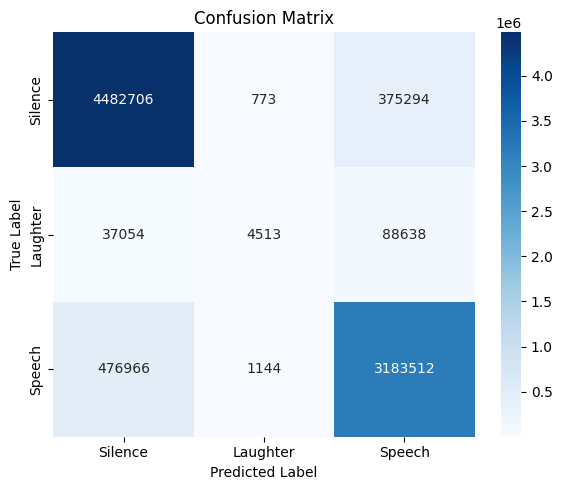

✅ Frame-level Accuracy: 0.8867


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = model2.predict(X_val)
y_pred_classes = np.argmax(y_pred_probs, axis=-1)

y_true_flat = y_val.flatten()
y_pred_flat = y_pred_classes.flatten()

print("🔍 Classification Report:")
print(classification_report(
    y_true_flat, y_pred_flat, 
    target_names=["Silence", "Laughter", "Speech"],
    digits=4
))

cm = confusion_matrix(y_true_flat, y_pred_flat)
labels = ["Silence", "Laughter", "Speech"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

frame_accuracy = accuracy_score(y_true_flat, y_pred_flat)
print(f" {frame_accuracy:.4f}")


In [63]:
import numpy as np

flat_labels = np.concatenate(y_train, axis=0).flatten()

class_counts = np.bincount(flat_labels, minlength=3)
total = class_counts.sum()
class_weights = total / (3 * class_counts)
print("Class weights:", class_weights)


Class weights: [ 0.59308095 22.21781325  0.78809621]


In [68]:

from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=3)
y_val_onehot = to_categorical(y_val, num_classes=3)

flat_labels = np.concatenate(y_train, axis=0).flatten()
class_counts = np.bincount(flat_labels, minlength=3)
total = class_counts.sum()
class_weights = total / (3 * class_counts)

sample_weights_train = class_weights[y_train]
sample_weights_val = class_weights[y_val]

history = model1.fit(
    X_train,
    y_train_onehot,
    sample_weight=sample_weights_train,
    validation_data=(X_val, y_val_onehot, sample_weights_val),
    epochs=7,
    batch_size=64
)


Epoch 1/7
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 355s 64ms/step - accuracy: 0.7278 - loss: 0.7747 - val_accuracy: 0.7693 - val_loss: 0.6111
Epoch 2/7
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 359s 66ms/step - accuracy: 0.7946 - loss: 0.6377 - val_accuracy: 0.8030 - val_loss: 0.5728
Epoch 3/7
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 383s 67ms/step - accuracy: 0.8024 - loss: 0.6247 - val_accuracy: 0.8269 - val_loss: 0.5630
Epoch 4/7
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 388s 68ms/step - accuracy: 0.8084 - loss: 0.6208 - val_accuracy: 0.8296 - val_loss: 0.5663
Epoch 5/7
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 379s 67ms/step - accuracy: 0.8126 - loss: 0.6088 - val_accuracy: 0.8290 - val_loss: 0.5968
Epoch 6/7
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 389s 68ms/step - accuracy: 0.8164 - loss: 0.5984 - val_accuracy: 0.8299 - val_loss: 0.5830
Epoch 7/7
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 389s 70ms/step - accuracy: 0.8064 - loss: 0.6199 - val_accuracy: 0.8500 - val_loss: 0.5718


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step
Classification Report:
              precision    recall  f1-score   support

     Silence       0.90      0.89      0.89   4852614
    Laughter       0.17      0.60      0.26    130783
      Speech       0.87      0.81      0.84   3667403

    accuracy                           0.85   8650800
   macro avg       0.65      0.77      0.67   8650800
weighted avg       0.88      0.85      0.86   8650800

1352/1352 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step


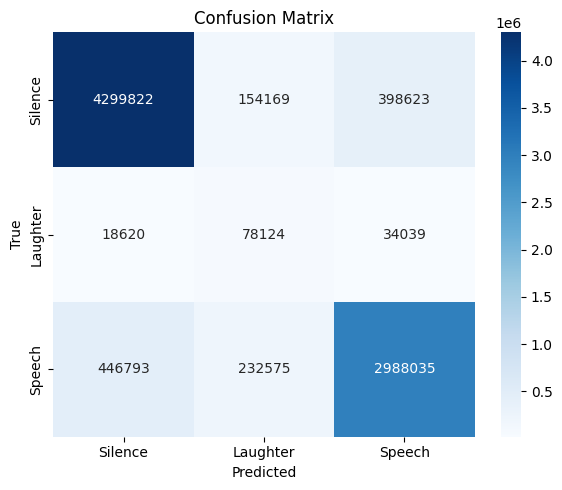

In [70]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_probs = model1.predict(X_test)

y_pred_flat = np.argmax(y_pred_probs, axis=-1).flatten()
y_true_flat = np.argmax(y_test_onehot, axis=-1).flatten()

print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=["Silence", "Laughter", "Speech"]))

y_pred_probs = model1.predict(X_test)
y_pred_flat = np.argmax(y_pred_probs, axis=-1).flatten()
y_true_flat = y_test.flatten()

cm = confusion_matrix(y_true_flat, y_pred_flat)
labels = ["Silence", "Laughter", "Speech"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [14]:

from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=3)
y_val_onehot = to_categorical(y_val, num_classes=3)

flat_labels = np.concatenate(y_train, axis=0).flatten()
class_counts = np.bincount(flat_labels, minlength=3)
total = class_counts.sum()
class_weights = total / (3 * class_counts)

sample_weights_train = class_weights[y_train]
sample_weights_val = class_weights[y_val]

history = model3.fit(
    X_train,
    y_train_onehot,
    sample_weight=sample_weights_train,
    validation_data=(X_val, y_val_onehot, sample_weights_val),
    epochs=4,
    batch_size=64
)


Epoch 1/4
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 1343s 248ms/step - accuracy: 0.8111 - loss: 0.6168 - val_accuracy: 0.7235 - val_loss: 0.7064
Epoch 2/4
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 1117s 207ms/step - accuracy: 0.8307 - loss: 0.5404 - val_accuracy: 0.6457 - val_loss: 0.7665
Epoch 3/4
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 1260s 225ms/step - accuracy: 0.8383 - loss: 0.5096 - val_accuracy: 0.7867 - val_loss: 0.5225
Epoch 4/4
5407/5407 ━━━━━━━━━━━━━━━━━━━━ 1222s 225ms/step - accuracy: 0.8457 - loss: 0.4874 - val_accuracy: 0.7839 - val_loss: 0.4990


In [15]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_probs = model3.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)

y_true_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

print("Classification Report:\n")
print(classification_report(y_true_flat, y_pred_flat))


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 65s 47ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.84      0.89   4852614
           1       0.08      0.84      0.14    130783
           2       0.88      0.71      0.79   3667403

    accuracy                           0.78   8650800
   macro avg       0.64      0.80      0.61   8650800
weighted avg       0.91      0.78      0.84   8650800



In [6]:
import os
import glob
import random

label_folder = r"C:\Users\micha\Documents\project (backup)\switchboard1\combined"
output_file = 'non_laughter_timestamps.txt'


def extract_non_laughter_timings(label_folder, output_file, samples_per_file=5):
    all_selected_clips = []

    for filename in os.listdir(label_folder):
        file_path = os.path.join(label_folder, filename)
        base_name = os.path.splitext(filename)[0]

        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        non_laughter_clips = []

        for line in lines:
            parts = line.strip().split('\t')
                
            if len(parts) >= 6:
                file_id, segment_id, start_time, end_time, _, transcript, _ = parts[:7]
                transcript_clean = transcript.strip().lower()

                if '[laughter]' not in transcript_clean:
                    try:
                        start_time = float(start_time)
                        end_time = float(end_time)
                        if (end_time - start_time) > 0.5:
                            non_laughter_clips.append((base_name, start_time, end_time))
                    except ValueError:
                        continue
        selected = random.sample(non_laughter_clips, min(samples_per_file, len(non_laughter_clips)))
        all_selected_clips.extend(selected)

    with open(output_file, 'w') as out_f:
        for clip in all_selected_clips:
            out_f.write(f"{clip[0]},{clip[1]:.6f},{clip[2]:.6f}\n")


extract_non_laughter_timings(label_folder, output_file, samples_per_file=5)
print ("done")

done


In [8]:
import os
from pydub import AudioSegment


audio_folder = r"C:\Users\micha\Documents\project (backup)\switchboard1\wav"
output_folder = r"C:\Users\micha\Documents\project (backup)\Project Notebook\non_laughter_clips"
timestamps_file = r"C:\Users\micha\Documents\project (backup)\Project Notebook\non_laughter_timestamps.txt"

os.makedirs(output_folder, exist_ok=True)

audio_cache = {}

# Load the timestamps
with open(timestamps_file, 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip()
    if not line:
        continue
    
    parts = line.split(',')
    if len(parts) != 3:
        print(f"Skipping malformed line: {line}")
        continue

    filename, start_time, end_time = parts
    start_time = float(start_time) * 1000
    end_time = float(end_time) * 1000

    base_filename = filename[:-1]
    channel_indicator = filename[-1].upper()

    # Load base audio only once
    if base_filename not in audio_cache:
        audio_path = os.path.join(audio_folder, f"{base_filename}.wav")
        if not os.path.exists(audio_path):
            print(f"File not found: {audio_path}")
            continue
        audio = AudioSegment.from_wav(audio_path)
        left, right = audio.split_to_mono()
        audio_cache[base_filename] = {'A': left, 'B': right}

    if channel_indicator not in ('A', 'B'):
        print(f"Unknown channel indicator in filename: {filename}")
        continue

    channel_audio = audio_cache[base_filename][channel_indicator]
    clip = channel_audio[start_time:end_time]
    clip_filename = f"{filename}_{int(start_time)}_{int(end_time)}.wav"
    clip_path = os.path.join(output_folder, clip_filename)
    clip.export(clip_path, format="wav")

print("done")


done


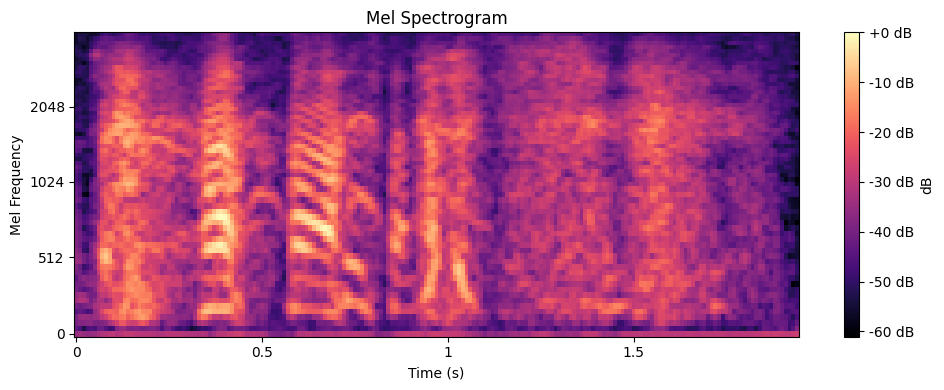

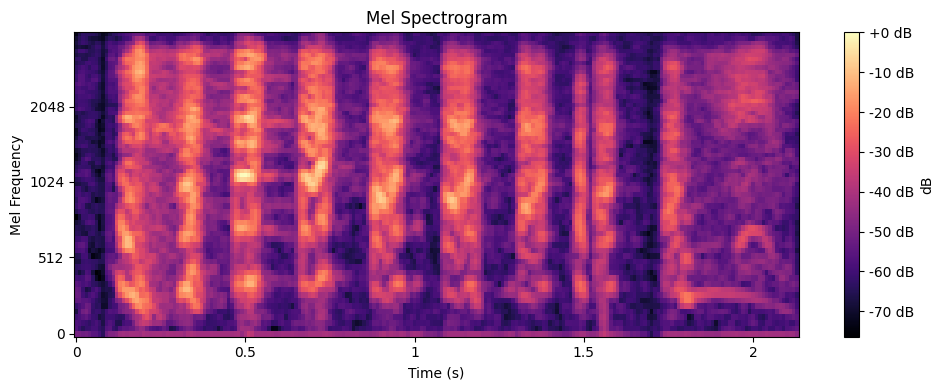

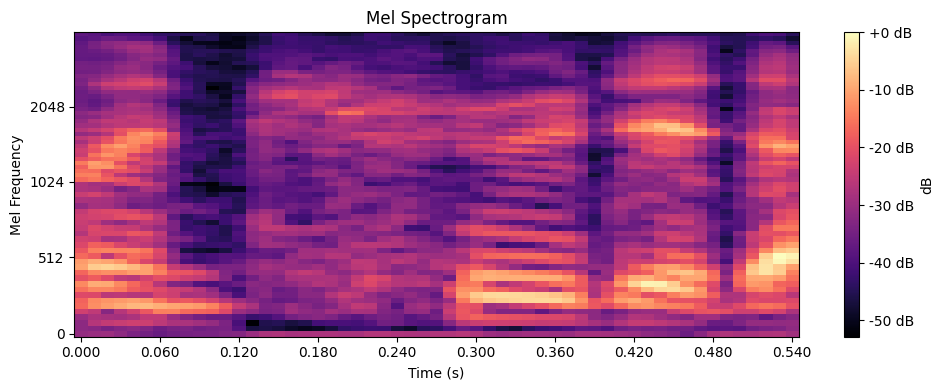

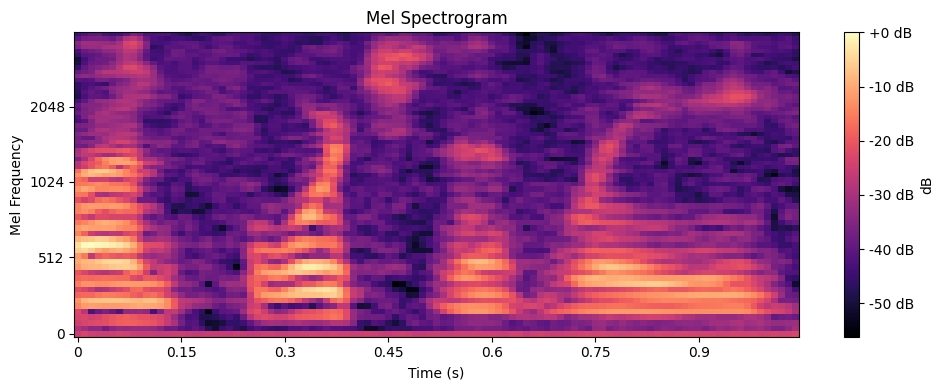

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_path = r"C:\Users\micha\Documents\project (backup)\Project Notebook\laughter_clips\sw02012_253582_255527.wav"
y, sr = librosa.load(file_path, sr=8000)


S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=400, hop_length=80, n_mels=64)

S_dB = librosa.power_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=80, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB', label='dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()

file_path = r"C:\Users\micha\Documents\project (backup)\Project Notebook\laughter_clips\sw02006_421331_423461.wav"
y, sr = librosa.load(file_path, sr=8000)


S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=400, hop_length=80, n_mels=64)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=80, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB', label='dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()


file_path = r"C:\Users\micha\Documents\project (backup)\Project Notebook\non_laughter_clips\sw02012B_167497_168037.wav"
y, sr = librosa.load(file_path, sr=8000)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=400, hop_length=80, n_mels=64)

S_dB = librosa.power_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=80, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB', label='dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()

file_path = r"C:\Users\micha\Documents\project (backup)\Project Notebook\non_laughter_clips\sw02039A_64722_65767.wav"
y, sr = librosa.load(file_path, sr=8000)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=400, hop_length=80, n_mels=64)

S_dB = librosa.power_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=80, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB', label='dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()



In [46]:
import tensorflow as tf
import numpy as np
import os

def load_npy_file(path):
    spec = np.load(path.decode())
    return spec.astype(np.float32)

def create_dataset(npy_folder, label):
    files = [os.path.join(npy_folder, f) for f in os.listdir(npy_folder)]
    labels = [label] * len(files)
    return files, labels

laughter_files, laughter_labels = create_dataset(r"C:\Users\micha\Documents\project (backup)\Project Notebook\Spectograms\laughter", 1)
non_laughter_files, non_laughter_labels = create_dataset(r"C:\Users\micha\Documents\project (backup)\Project Notebook\Spectograms\nonlaughter", 0)

file_paths = laughter_files + non_laughter_files
labels = laughter_labels + non_laughter_labels

path_ds = tf.data.Dataset.from_tensor_slices(file_paths)
label_ds = tf.data.Dataset.from_tensor_slices(labels)

spec_ds = path_ds.map(lambda x: tf.numpy_function(load_npy_file, [x], tf.float32))

dataset = tf.data.Dataset.zip((spec_ds, label_ds))
dataset = dataset.map(lambda x, y: (tf.expand_dims(x, -1), tf.one_hot(y, 2)))
dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

print ("done")

done


In [47]:

path_ds = tf.data.Dataset.from_tensor_slices(file_paths)
label_ds = tf.data.Dataset.from_tensor_slices(labels)

spec_ds = path_ds.map(lambda x: tf.numpy_function(load_npy_file, [x], tf.float32))

dataset = tf.data.Dataset.zip((spec_ds, label_ds))
dataset = dataset.map(lambda x, y: (tf.expand_dims(x, -1), tf.one_hot(y, 2)))
dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_size = int(0.8 * len(file_paths))
val_size = len(file_paths) - train_size

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)

print ("done")

done


In [49]:
import numpy as np

spectrogram = np.load(r"C:\Users\micha\Documents\project (backup)\Project Notebook\Spectograms\laughter\sw02006_421331_423461.npy")

spectrogram2 = np.load(r"C:\Users\micha\Documents\project (backup)\Project Notebook\Spectograms\laughter\sw02012_253582_255527.npy")
print(spectrogram.shape)
print(spectrogram2.shape)

(128, 128, 1)
(128, 128, 1)


In [32]:
import numpy as np
import os
import cv2

def pad_spectrogram(spectrogram, target_width=128):
    current_width = spectrogram.shape[1]
    padding_width = target_width - current_width
    
    if padding_width > 0:
        pad_left = padding_width // 2
        pad_right = padding_width - pad_left
        spectrogram = np.pad(spectrogram, ((0, 0), (pad_left, pad_right)), mode='constant', constant_values=0)

    return spectrogram

spectrogram = np.random.rand(128, 34)
padded_spectrogram = pad_spectrogram(spectrogram)
print(padded_spectrogram.shape)


def pad_or_resize_spectrograms(directory, target_size=(128, 128), mode='pad'):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        spectrogram = np.load(file_path)
            
        if mode == 'pad':
            spectrogram = pad_spectrogram(spectrogram, target_size[1])
        elif mode == 'resize':
            spectrogram = resize_spectrogram(spectrogram, target_size[1], target_size[0])
            
        np.save(file_path, spectrogram)


directory = r"C:\Users\micha\Documents\project (backup)\Project Notebook\Spectograms\non_laughter_spectograms"
pad_or_resize_spectrograms(directory, target_size=(128, 128), mode='pad')

print ("done")

(128, 128)
done


In [53]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

laughter_folder = r"C:\Users\micha\Documents\project (backup)\Project Notebook\Spectograms\laughter"
non_laughter_folder = r"C:\Users\micha\Documents\project (backup)\Project Notebook\Spectograms\nonlaughter"

def load_data(laughter_folder, non_laughter_folder):
    mel_specs = []
    labels = []

    for filename in os.listdir(laughter_folder):
        file_path = os.path.join(laughter_folder, filename)
        mel_spec = np.load(file_path)
        mel_specs.append(mel_spec)
        labels.append(1)
    
    for filename in os.listdir(non_laughter_folder):
        file_path = os.path.join(non_laughter_folder, filename)
        mel_spec = np.load(file_path)
        mel_specs.append(mel_spec)
        labels.append(0)


    mel_specs = np.array(mel_specs) / 255.0
    labels = np.array(labels)
    
    return mel_specs, labels

mel_specs, labels = load_data(laughter_folder, non_laughter_folder)


print(mel_specs.shape)
X_train, X_val, y_train, y_val = train_test_split(mel_specs, labels, test_size=0.2, random_state=42)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(buffer_size=1000)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)


(17856, 128, 128, 1)


In [54]:


from tensorflow.keras import layers, models

modelcnn = models.Sequential([
    layers.Input(shape=(128, 128, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # binary classification (laughter vs non-laughter)
])

modelcnn.summary()


modelcnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = modelcnn.fit(
    train_dataset,
    epochs=10,  # Set the number of epochs
    validation_data=val_dataset,  # Use the validation set
)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.6928 - loss: 0.5722 - val_accuracy: 0.8656 - val_loss: 0.3305
Epoch 2/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.8639 - loss: 0.3222 - val_accuracy: 0.8925 - val_loss: 0.2564
Epoch 3/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.8949 - loss: 0.2611 - val_accuracy: 0.8964 - val_loss: 0.2555
Epoch 4/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 36s 79ms/step - accuracy: 0.9025 - loss: 0.2397 - val_accuracy: 0.9143 - val_loss: 0.2124
Epoch 5/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 36s 79ms/step - accuracy: 0.9082 - loss: 0.2272 - val_accuracy: 0.9141 - val_loss: 0.2146
Epoch 6/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 36s 79ms/step - accuracy: 0.9079 - loss: 0.2238 - val_accuracy: 0.9185 - val_loss: 0.2052
Epoch 7/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.9135 - loss: 0.2139 - val_accuracy: 0.9219 - val_loss: 0.2004
Epoch 8/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 36s 80ms/step - accuracy: 0.9165 - loss: 0.2057 - 

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
Classification Report:
              precision    recall  f1-score   support

Non-laughter       0.92      0.93      0.93      1709
    Laughter       0.93      0.93      0.93      1863

    accuracy                           0.93      3572
   macro avg       0.93      0.93      0.93      3572
weighted avg       0.93      0.93      0.93      3572

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


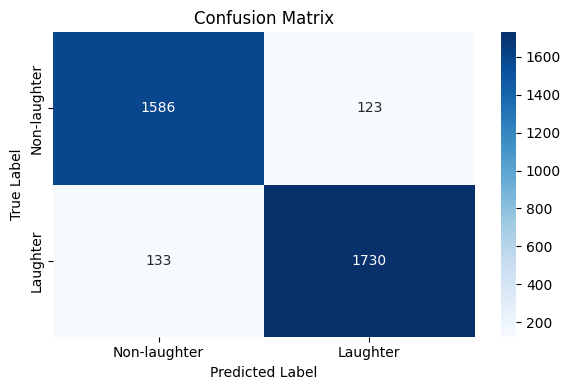

In [56]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelcnn.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)

# generate classification report
report = classification_report(y_val, y_pred_classes, target_names=['Non-laughter', 'Laughter'])
print("Classification Report:")
print(report)

y_pred_probs = modelcnn.predict(X_val)

y_pred_classes = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-laughter', 'Laughter'],
            yticklabels=['Non-laughter', 'Laughter'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [58]:
modelcnn.save('laughter_model.keras')

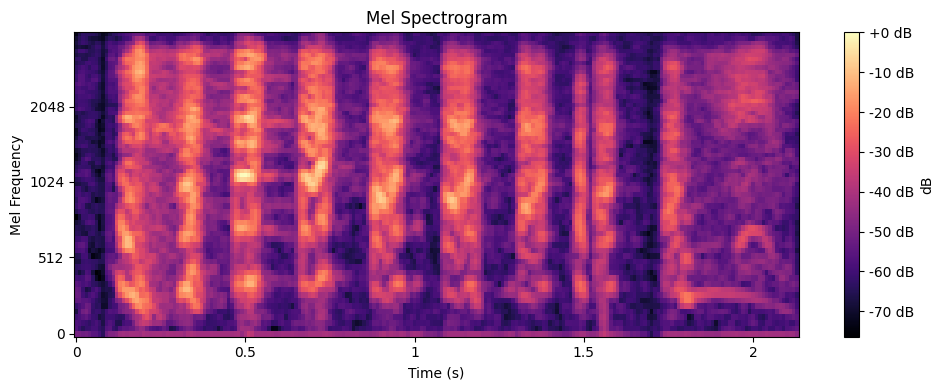

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(laughter_path, sr=8000)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=400, hop_length=80, n_mels=64)

S_dB = librosa.power_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, hop_length=80, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB', label='dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()